<a href="https://colab.research.google.com/github/Harish26242002/My-Datascience-works/blob/main/Hands_on_Banking_notes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Dec  9 05:40:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             14W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XH9iMHmSjeS9wZZ4nsek")
project = rf.workspace("daniel-raj-c").project("currency-recognition-model-g16wl")
version = project.version(5)
dataset = version.download("yolov8")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=4 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Currency-Recognition-Model-5/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

In [ ]:
import os

train_root = "/content/runs/detect/"

print("Folders inside runs/detect/:")
print(os.listdir(train_root))


Folders inside runs/detect/:
['train', 'train6', 'train5', 'train3', 'train4', 'train2']


In [ ]:
import os

base = "/content/runs/detect/"

train_folders = [
    os.path.join(base, f)
    for f in os.listdir(base)
    if os.path.isdir(os.path.join(base, f)) and f.startswith("train")
]

latest_train = max(train_folders, key=os.path.getmtime)

print("Latest training folder:", latest_train)


Latest training folder: /content/runs/detect/train6


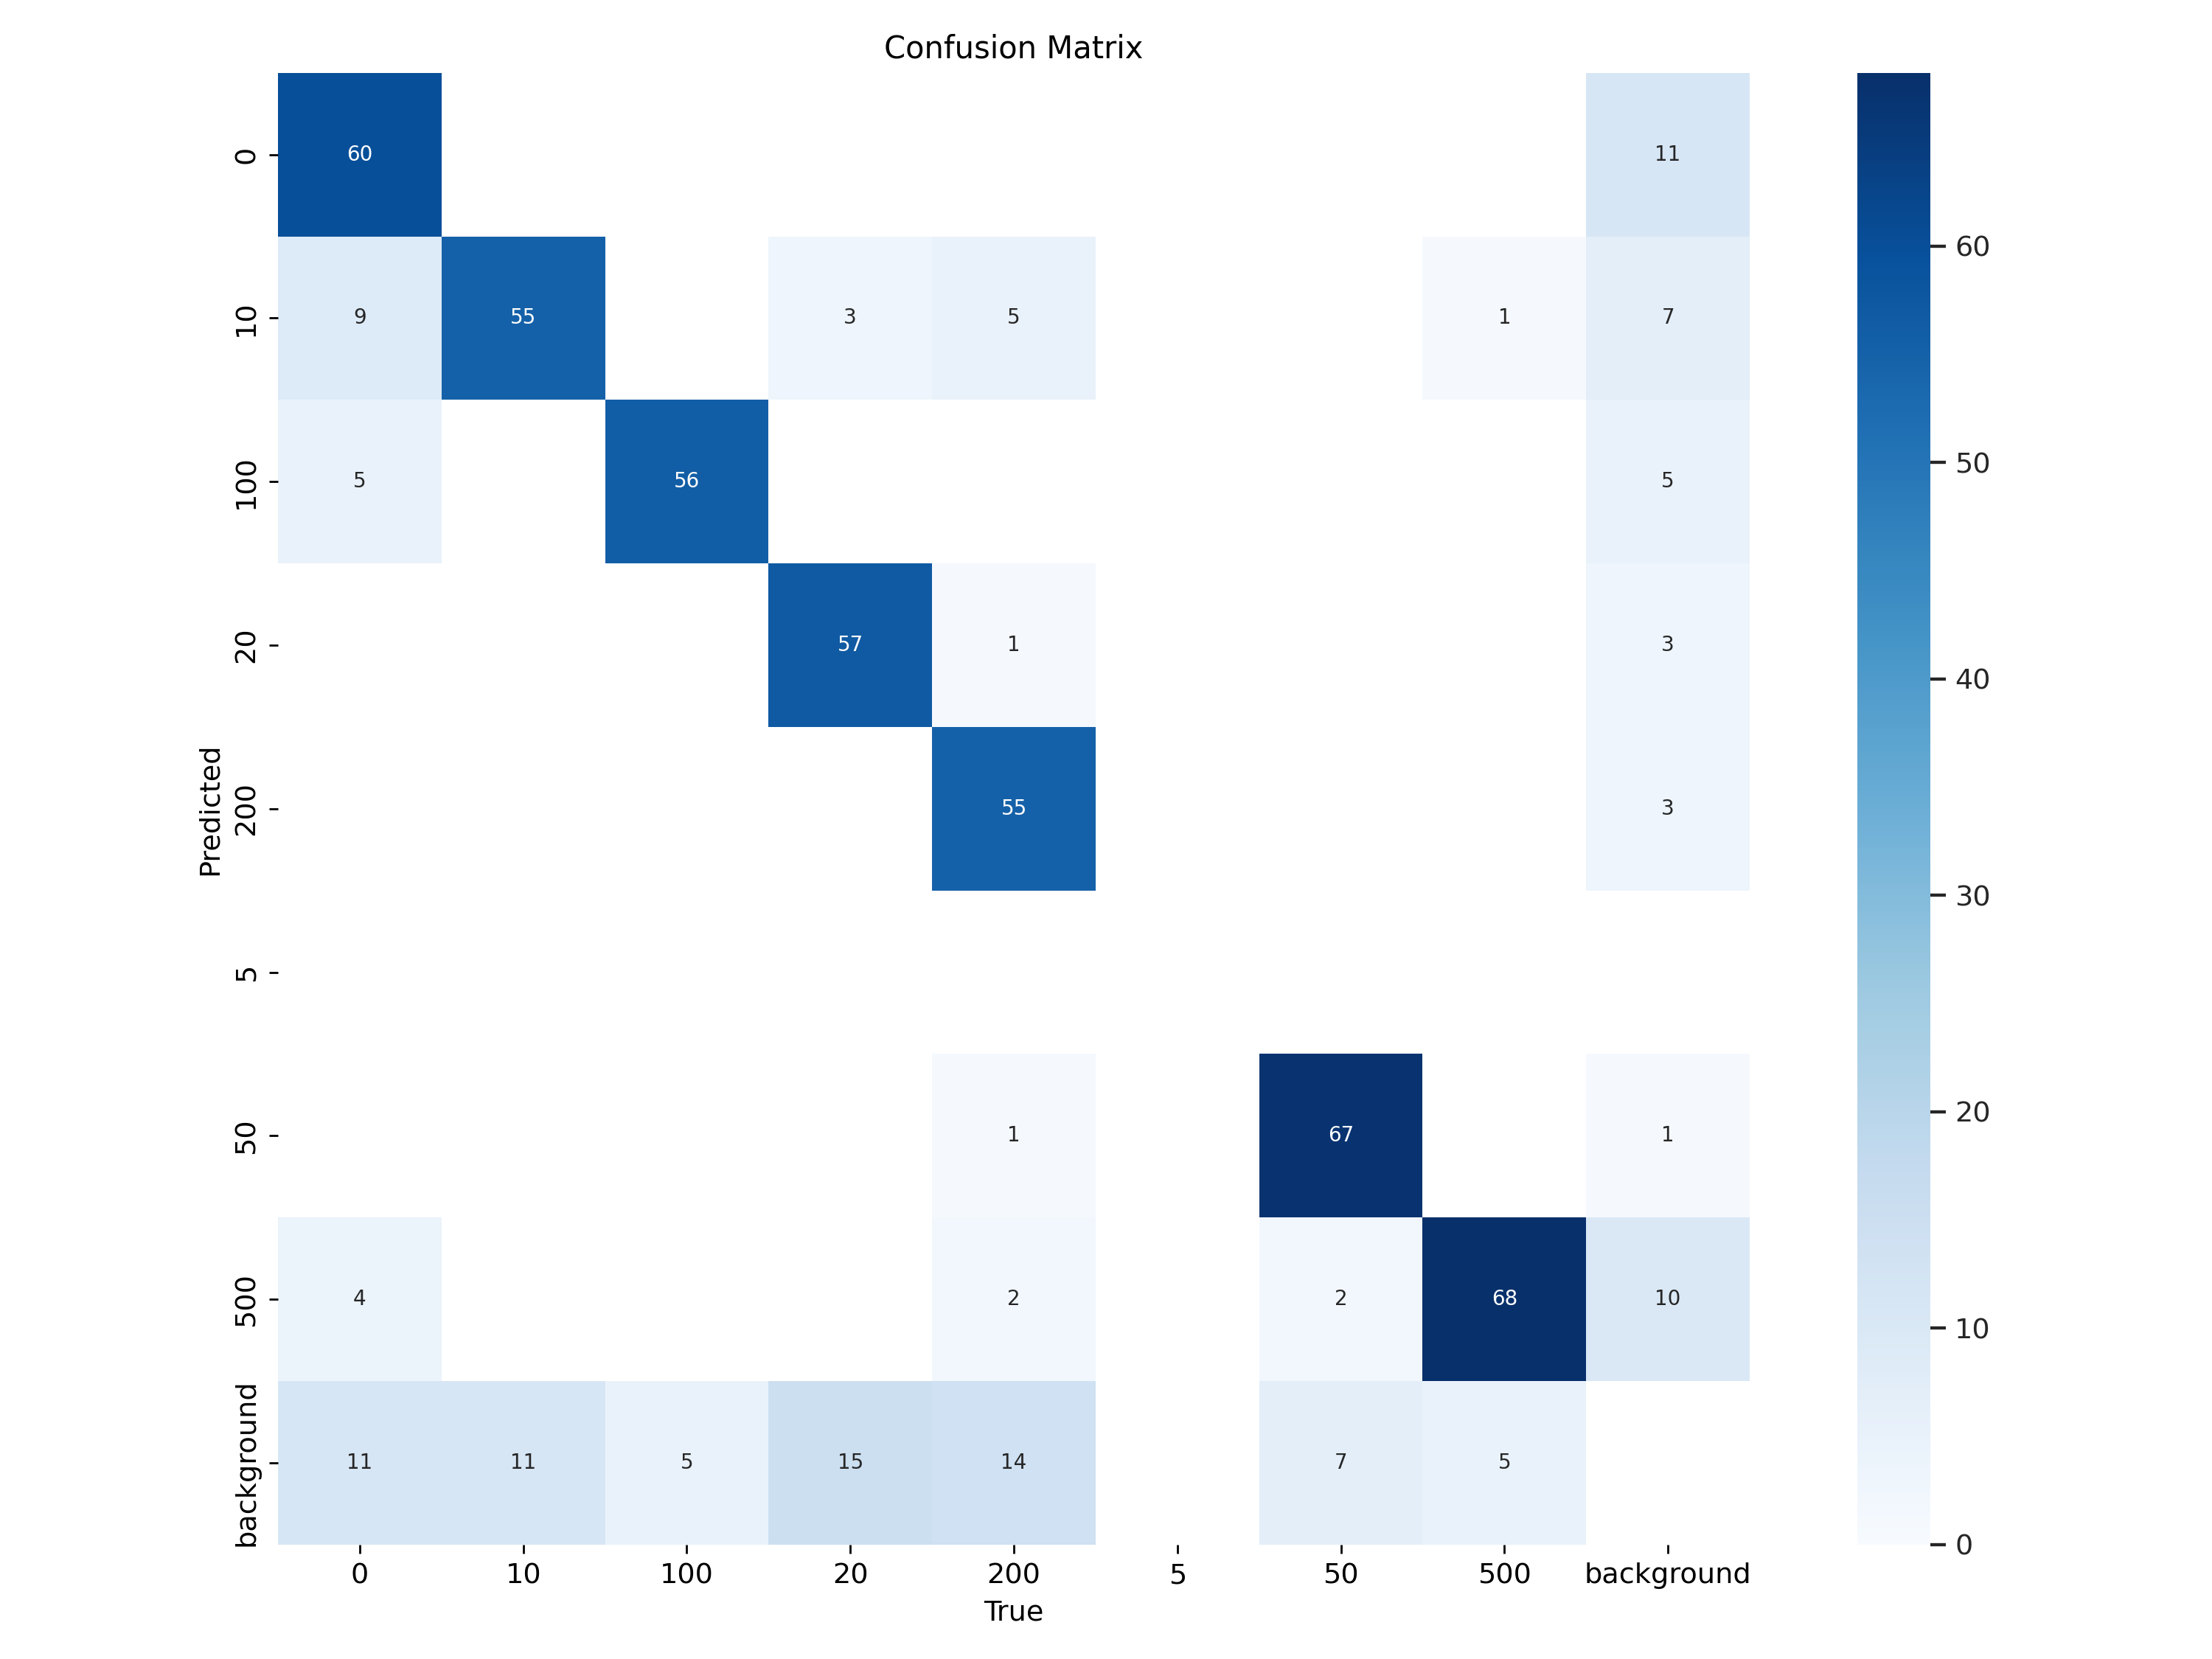

In [ ]:
correct_folder = "/content/runs/detect/train5"

from IPython.display import Image, display
display(Image(filename=f"{correct_folder}/confusion_matrix.png", width=600))


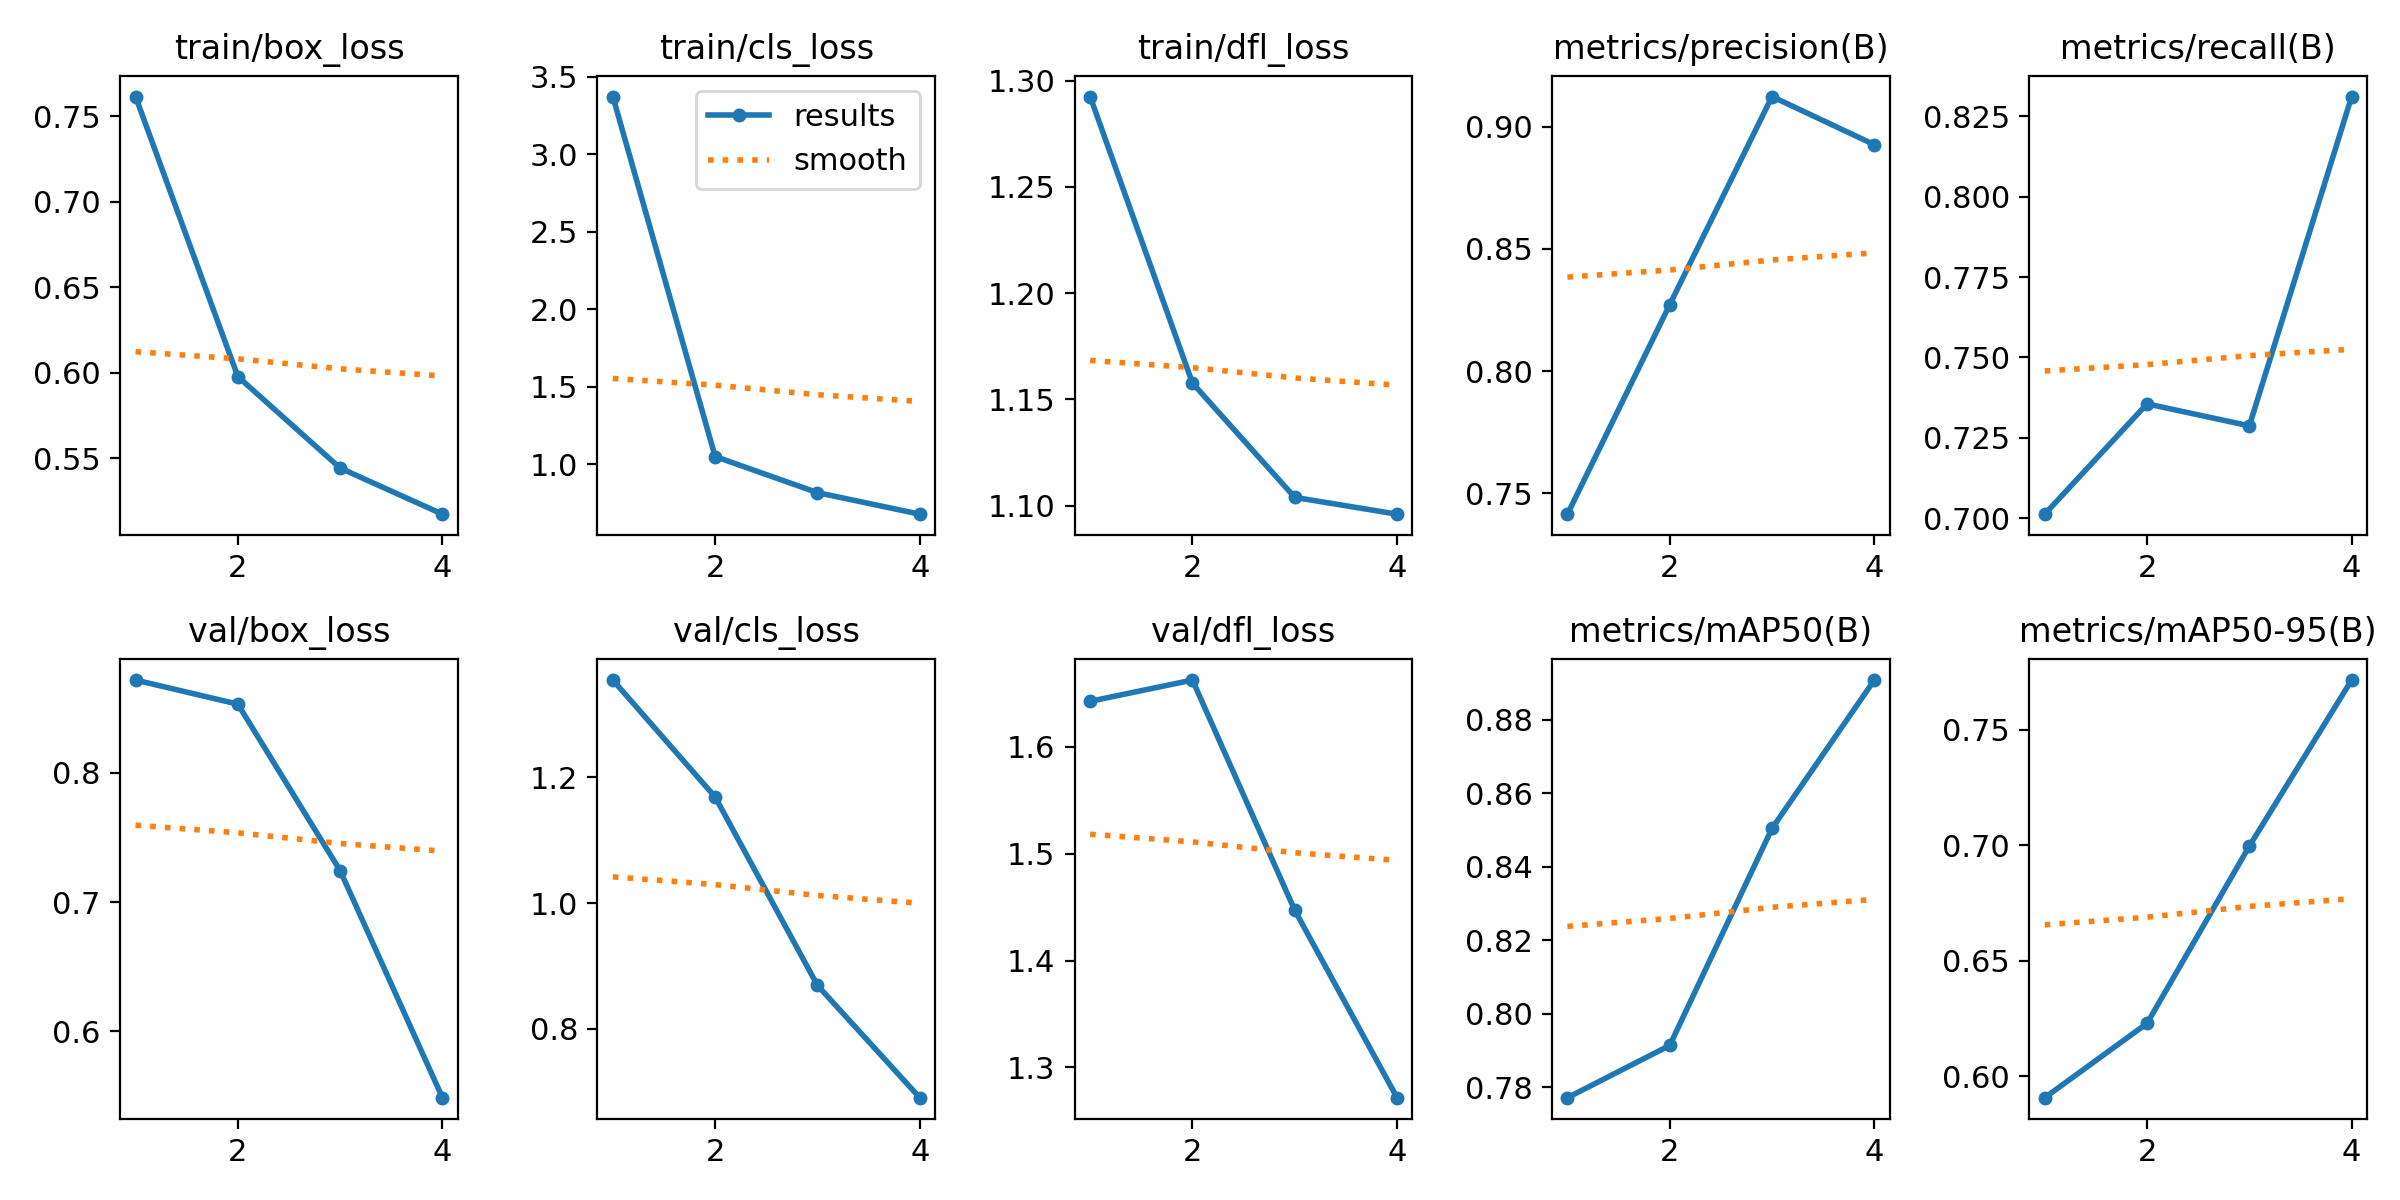

In [ ]:
display(Image(filename=f"{correct_folder}/results.png", width=600))


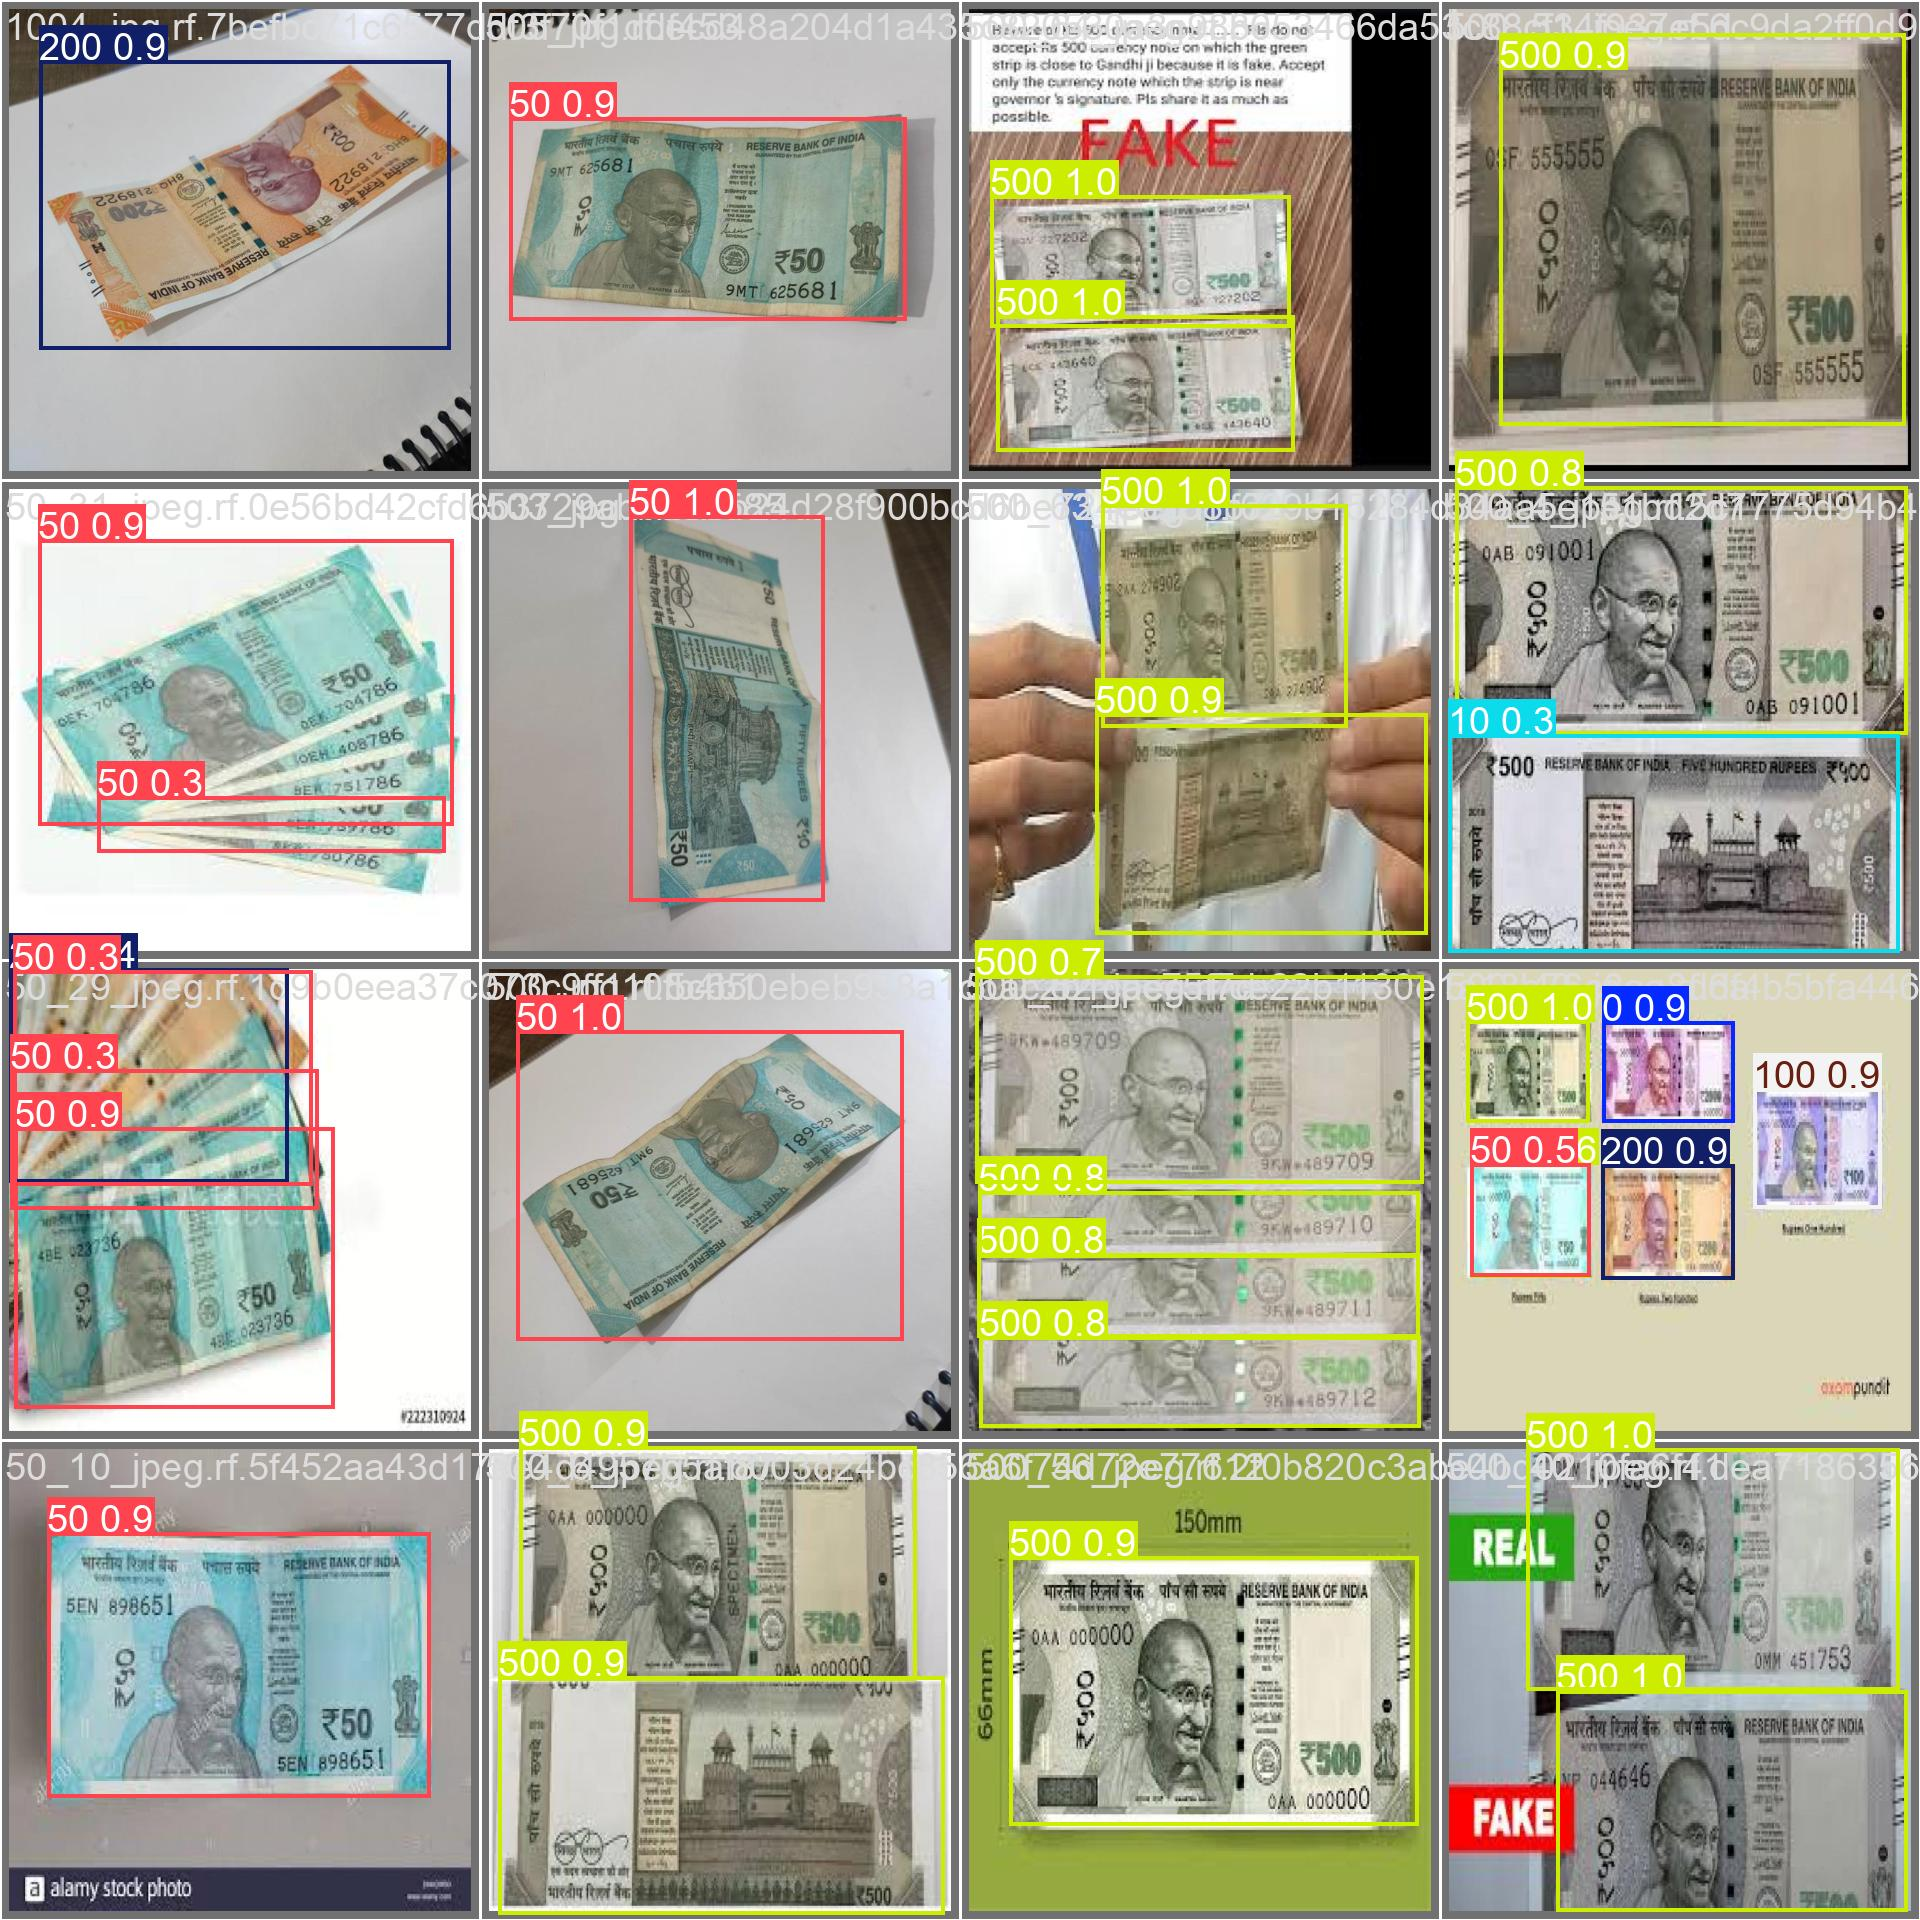

In [ ]:
display(Image(filename=f"{correct_folder}/val_batch0_pred.jpg", width=600))


In [ ]:
best_pt = "/content/runs/detect/train5/weights/best.pt"
last_pt = "/content/runs/detect/train5/weights/last.pt"

print("BEST MODEL :", best_pt)
print("LAST MODEL :", last_pt)


BEST MODEL : /content/runs/detect/train5/weights/best.pt
LAST MODEL : /content/runs/detect/train5/weights/last.pt


In [ ]:
!yolo task=detect mode=predict \
    model=/content/runs/detect/train5/weights/best.pt \
    source={dataset.location}/test/images \
    conf=0.25 save=True


Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

image 1/188 /content/datasets/Currency-Recognition-Model-5/test/images/100_14_jpeg.rf.d594563f2073ddcc694ffffd3b4ebe5a.jpg: 800x800 1 100, 22.3ms
image 2/188 /content/datasets/Currency-Recognition-Model-5/test/images/100_21_jpeg.rf.1c3199d01ecdd47c7cfa7b80c97edece.jpg: 800x800 1 100, 22.3ms
image 3/188 /content/datasets/Currency-Recognition-Model-5/test/images/100_45-copy-_jpeg.rf.c2751df185e38e754b2a9b0aa82d3032.jpg: 800x800 13 100s, 22.3ms
image 4/188 /content/datasets/Currency-Recognition-Model-5/test/images/1010_jpg.rf.8f4b770f4a86ec2b225a2832077afc32.jpg: 800x800 1 200, 1 500, 22.3ms
image 5/188 /content/datasets/Currency-Recognition-Model-5/test/images/1015_jpg.rf.d5a491a59948546c6a10538c1fc9145d.jpg: 800x800 1 200, 22.3ms
image 6/188 /content/datasets/Currency-Recognition-Model-5/test/images/1016_jpg.rf.6ce8da

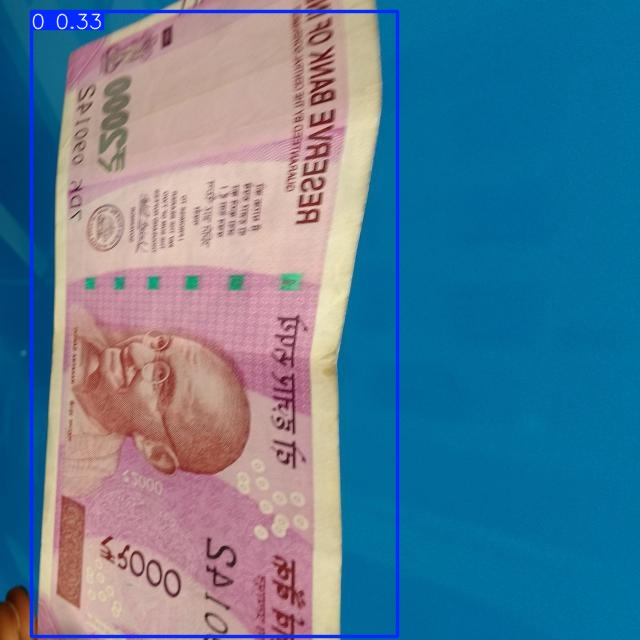

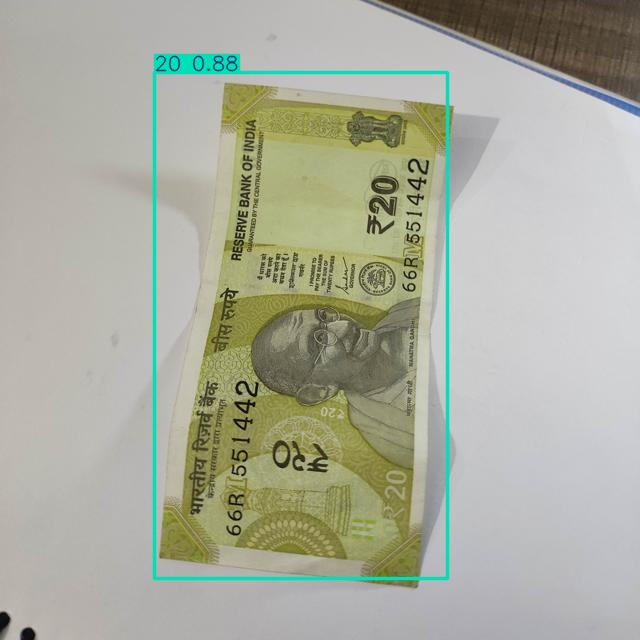

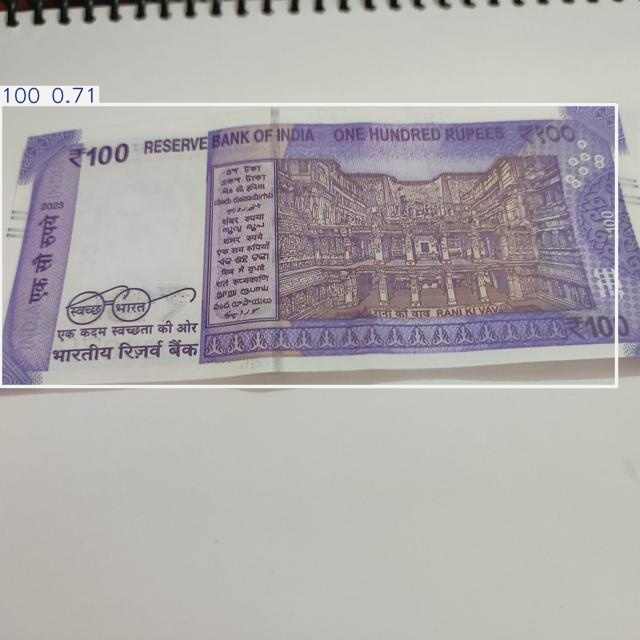

In [ ]:
import glob
from IPython.display import Image, display

pred_folder = "/content/runs/detect/predict"
pred_images = glob.glob(pred_folder + "/*.jpg")[:3]  # show first 3 results

for img in pred_images:
    display(Image(filename=img, width=600))
    print("\n")
